# Hotel Bookings and Cancellation Dataset

**About the Data:** The Hotel Bookings and Cancellation Dataset is available at Kaggle. The Dataset consists of several classification and linear variables. This dataset could be used several ways, but for the purpose of this project, we will try to predict and identify key features that lead to a booking cancellation. 

Objective: The Objective is to try different Machine Learning models and see if their is any meaningful relationship between the variables in this dataset. 

Business Case: It would be helpful to identify a business case for this project. One potential Business case would be to identify the factors that affect or lead to booking cancellations. If for example, a certain room type, gets cancelled the most by a certain cvategory of customer, the Hotel could use the infomation to possibly reduce cancellations. 

In [2]:
#Import all necessary packages, update as required. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import category_encoders as ce



/Users/vikasbansal/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#import csv data file
data = pd.read_csv("hotel_bookings.csv")


**Column Information**: 
- **Hotel**
 * H1: Resort hotel
 * H2: City hotel
- **is_canceled**
 * 1: Canceled 
 * 0: Not canceled
- **lead_time**
 * No of days thaat elapsed between entering date of booking into property management system and arrival date
- **arrival_date_year**
 * Year of arrival date (2015-2017)
- **arrival_date_month**
 * Month of arrival date (Jan - Dec)
- **arrival_date_week_numberr**
 * Week number of year for arrival date (1-53)
- **arrival_date_day_of_month**
 * Day of arrival date
- **stays_in_weekend_nights**
 * No of weekend nights (Sat/Sun) the guest stayed or booked to stay at the hotel
- **stays_in_week_nights**
 * No of week nights (Mon - Fri) the guest stayed or booked to stay at the hotel
- **Adults** 
- **Children**
- **Babies**
- **meal** 
 * Type of meal booked. Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- **country**
- **market_segment** (a group of people who share one or more common characteristics, lumped together for marketing purposes)
 * TA: Travel agents
 * TO: Tour operators 
- **distribution_channel** (A distribution channel is a chain of businesses or intermediaries through which a good or service passes until it reaches the final buyer or the end consumer)
 * TA: Travel agents
 * TO: Tour operators
- **is_repeated_guest** (value indicating if the booking name was from repeated guest)
 * 1: Yes
 * 0: No
- **previous_cancellations**
 * Number of previous bookings that were cancelled by the customer prior to the current booking
- **previous_bookings_not_canceled**
 * Number of previous bookings not cancelled by the customer prior to the current booking
- **reserved_room_type**
 * Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- **assigned_room_type**
 * Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- **booking_changes**
 * Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- **deposit_type**
 * Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- **agent**
 * ID of the travel agency that made the booking 
- **company**
 * ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- **day_in_waiting_list**
 * Number of days the booking was in the waiting list before it was confirmed to the customer
- **customer_type**
 * Contract - when the booking has an allotment or other type of contract associated to it; 
 * Group – when the booking is associated to a group; 
 * Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; 
 * Transient-party – when the booking is transient, but is associated to at least other transient booking
- **adr (average daily rate)**
 * average daily rate = $ \frac{Sum Of All Lodging Transaction}{Total Number Of Staying Night}$
- **required_car_parking_spaces**
 * Number of car parking spaces required by the customer 
- **total_of_special_requests**
 * Number of special requests made by the customer (e.g. twin bed or high floor)
- **reservation_status**
 * Canceled – booking was canceled by the customer; 
 * Check-Out – customer has checked in but already departed; 
 * No-Show – customer did not check-in and did inform the hotel of the reason why
- **reservation_status_date**
 * Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

We will consider this as our target variable. The cancelation variable ansers the simple yet powerful quesiton of whether a booking gets cancelled or not. If we could predict, how other variables affect this variable, this will be an important tool for the hotels.

## 1. Data Exploration and Data Cleaning

In [4]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Lets look at a few columns at Random to see which ones we can elimiate or use going forward. 

In [6]:
data.company.isna().value_counts(normalize = True)

True     0.943069
False    0.056931
Name: company, dtype: float64

Since 95% of this column is Null Values, we can chose to drop it from the analysis. Before moving forward, lets look at the Null values in other columns. 

In [7]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

It looks like "company" and "agent" are the only columns with significant Null values. Lets drop the 2 columns entirely. 

In [8]:
data = data.drop(columns = ['company', 'agent'])
data.shape

(119390, 30)

To handle the null values in "country" we will drop the rows as the number is insignificant. 

In [9]:
data = data.dropna(axis = 0)

Lets check the dataset again to make sure we handled all the null values correctly. 

In [10]:
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

**Lets Review the Type of Hotels**

([<matplotlib.patches.Wedge at 0x7fb6fbab02e8>,
 [Text(-0.9520945954321745, -0.5509227544300964, 'City Hotel'),
  Text(1.0386485932920646, 0.6010067384417713, 'Resort Hotel')],
 [Text(-0.519324324781186, -0.30050332059823437, '66.7%'),
  Text(0.6058783460870376, 0.35058726409103325, '33.3%')])

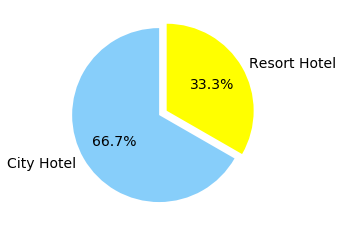

In [11]:
# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = data['hotel'].value_counts().index

# Convert value counts to list
sizes = data['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['lightskyblue','yellow']

# Putting them together. Sizes with the count, explode with the magnitude of separation between pies, colors with the colors, 
# autopct enables you to display the percent value using Python string formatting. .1f% will round off to the tenth place.
# startangle will allow the percentage to rotate counter-clockwise. Lets say we have 4 portions: 10%, 30%, 20% and 40%. The pie will rotate from smallest to the biggest (counter clockwise). 10% -> 20% -> 30% -> 40%
# We have only 2 sections so anglestart does not matter
# textprops will adjust the size of text
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

Looks like a lot of the hotels in the dataset are City hotels. Lets see how the Pricing and accomodations look like, to get some insight.

/Users/vikasbansal/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


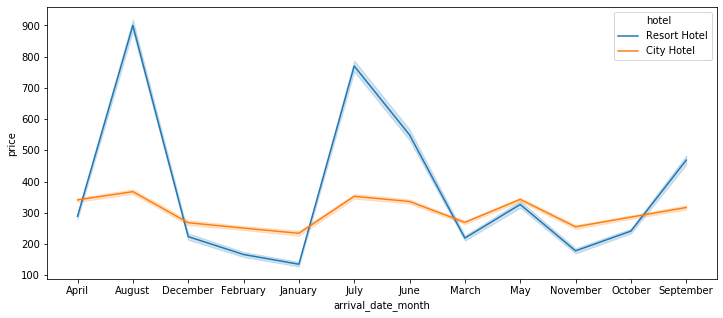

In [12]:
# Resizing plot 
plt.figure(figsize=(12,5))

# Calculating average daily rate per person
data['adr_pp'] = data['adr'] / (data['adults'] + data['children']) 
actual_guests = data.loc[data["is_canceled"] == 0]
actual_guests
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')

Lets try to understand the cancellations in details

Text(0.5, 1.0, 'Graph showing type of guest')

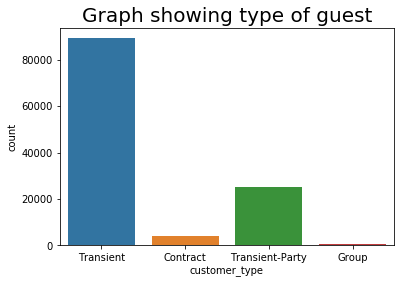

In [13]:
sns.countplot(data = data, x = 'customer_type').set_title('Graph showing type of guest', fontsize = 20)

In [14]:
#data['is_canceled'] = data.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
#canceled_data = data['is_canceled']
#sns.countplot(canceled_data)

This seems like a good point to assign our target variable in this dataset. We will use the Logistic nature of "is_canceled" as our target variable and use other variables to predict whether a booking gets cancelled or not. 

In [15]:
data_tgt = data['is_canceled']

We will now trim the number of columns to remove any that do not seem relevent for the model.

1. arrival_date_year                      
2. arrival_date_month                     
3. arrival_date_week_number               
4. arrival_date_day_of_month 
5. reservation_status                     
6. reservation_status_date
7. required_car_parking_spaces

In [16]:
df = data.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'reservation_status', 'reservation_status_date', 'required_car_parking_spaces', 'country'], axis = 1)

In [17]:
df.shape

(118898, 23)

In [18]:
df.is_canceled.replace('not_canceled','0',inplace = True)
df.is_canceled.replace('canceled','1',inplace = True)
df.is_canceled.value_counts(normalize=True)

0    0.628648
1    0.371352
Name: is_canceled, dtype: float64

In [19]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'total_of_special_requests', 'adr_pp'],
      dtype='object')

In [20]:
features = ['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'total_of_special_requests', 'adr_pp']

In [21]:
list(enumerate(features))

[(0, 'hotel'),
 (1, 'is_canceled'),
 (2, 'lead_time'),
 (3, 'stays_in_weekend_nights'),
 (4, 'stays_in_week_nights'),
 (5, 'adults'),
 (6, 'children'),
 (7, 'babies'),
 (8, 'meal'),
 (9, 'country'),
 (10, 'market_segment'),
 (11, 'distribution_channel'),
 (12, 'is_repeated_guest'),
 (13, 'previous_cancellations'),
 (14, 'previous_bookings_not_canceled'),
 (15, 'reserved_room_type'),
 (16, 'assigned_room_type'),
 (17, 'booking_changes'),
 (18, 'deposit_type'),
 (19, 'days_in_waiting_list'),
 (20, 'customer_type'),
 (21, 'adr'),
 (22, 'total_of_special_requests'),
 (23, 'adr_pp')]

In [22]:
df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,total_of_special_requests,adr_pp
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,Direct,...,0,C,C,3,No Deposit,0,Transient,0.0,0,0.0
1,Resort Hotel,0,737,0,0,2,0.0,0,BB,Direct,...,0,C,C,4,No Deposit,0,Transient,0.0,0,0.0
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,Direct,...,0,A,C,0,No Deposit,0,Transient,75.0,0,75.0
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,Corporate,...,0,A,A,0,No Deposit,0,Transient,75.0,0,75.0
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,Online TA,...,0,A,A,0,No Deposit,0,Transient,98.0,1,49.0


In [23]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'total_of_special_requests', 'adr_pp'],
      dtype='object')

In [24]:
for col in df.columns:
    print(col, ':', len(df[col].unique()))

hotel : 2
is_canceled : 2
lead_time : 479
stays_in_weekend_nights : 15
stays_in_week_nights : 33
adults : 14
children : 5
babies : 5
meal : 5
market_segment : 7
distribution_channel : 5
is_repeated_guest : 2
previous_cancellations : 15
previous_bookings_not_canceled : 73
reserved_room_type : 10
assigned_room_type : 12
booking_changes : 21
deposit_type : 3
days_in_waiting_list : 128
customer_type : 4
adr : 8870
total_of_special_requests : 6
adr_pp : 10690


In [26]:
y = data['is_canceled']
y
X = data.drop(['is_canceled', 'arrival_date_week_number','adr_pp','meal','reservation_status_date', 'country', 'reservation_status'], axis = 1)
X

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,342,2015,July,1,0,0,2,0.0,0,...,0,C,C,3,No Deposit,0,Transient,0.00,0,0
1,Resort Hotel,737,2015,July,1,0,0,2,0.0,0,...,0,C,C,4,No Deposit,0,Transient,0.00,0,0
2,Resort Hotel,7,2015,July,1,0,1,1,0.0,0,...,0,A,C,0,No Deposit,0,Transient,75.00,0,0
3,Resort Hotel,13,2015,July,1,0,1,1,0.0,0,...,0,A,A,0,No Deposit,0,Transient,75.00,0,0
4,Resort Hotel,14,2015,July,1,0,2,2,0.0,0,...,0,A,A,0,No Deposit,0,Transient,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,23,2017,August,30,2,5,2,0.0,0,...,0,A,A,0,No Deposit,0,Transient,96.14,0,0
119386,City Hotel,102,2017,August,31,2,5,3,0.0,0,...,0,E,E,0,No Deposit,0,Transient,225.43,0,2
119387,City Hotel,34,2017,August,31,2,5,2,0.0,0,...,0,D,D,0,No Deposit,0,Transient,157.71,0,4
119388,City Hotel,109,2017,August,31,2,5,2,0.0,0,...,0,A,A,0,No Deposit,0,Transient,104.40,0,0


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [28]:
X_train.reset_index(inplace=True)
X_test.reset_index(inplace=True)
X_train.drop(['index'], axis=1)
X_test.drop(['index'], axis=1)
X_train
X_test

,index,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,2690,Resort Hotel,9,2015,October,25,3,5,2,1.0,...,0,C,C,0,No Deposit,0,Transient,75.00,0,0
1,101948,City Hotel,80,2016,November,18,1,2,3,0.0,...,0,D,D,0,No Deposit,0,Transient,126.00,0,2
2,21916,Resort Hotel,5,2016,March,12,0,1,1,0.0,...,0,A,D,0,No Deposit,0,Transient,40.00,0,0
3,39978,Resort Hotel,15,2017,August,30,0,4,2,0.0,...,0,A,A,0,No Deposit,0,Transient,210.75,0,3
4,95507,City Hotel,320,2016,August,18,0,2,1,0.0,...,0,A,A,1,No Deposit,0,Transient-Party,90.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35665,118613,City Hotel,297,2017,August,11,4,8,2,1.0,...,0,A,A,1,No Deposit,0,Transient,39.67,0,0
35666,42735,City Hotel,71,2015,September,9,0,2,1,0.0,...,0,A,D,0,No Deposit,0,Transient-Party,90.00,0,0
35667,52830,City Hotel,6,2016,June,12,1,0,1,0.0,...,0,A,A,0,No Deposit,0,Transient,119.00,0,1
35668,83110,City Hotel,3,2017,March,27,1,0,1,0.0,...,6,A,E,0,No Deposit,0,Transient,65.00,0,0


In [29]:
# let's OHE our object columns
ohe = OneHotEncoder(sparse = False, handle_unknown='ignore')


X_categ_train = ohe.fit_transform(X_train[[c for c in X.columns if X[c].dtype in ['object']]])
X_categ_test = ohe.transform(X_test[[c for c in X.columns if X[c].dtype in ['object']]])

In [30]:
ohe.get_feature_names()

array(['x0_City Hotel', 'x0_Resort Hotel', 'x1_April', 'x1_August',
       'x1_December', 'x1_February', 'x1_January', 'x1_July', 'x1_June',
       'x1_March', 'x1_May', 'x1_November', 'x1_October', 'x1_September',
       'x2_Aviation', 'x2_Complementary', 'x2_Corporate', 'x2_Direct',
       'x2_Groups', 'x2_Offline TA/TO', 'x2_Online TA', 'x3_Corporate',
       'x3_Direct', 'x3_GDS', 'x3_TA/TO', 'x4_A', 'x4_B', 'x4_C', 'x4_D',
       'x4_E', 'x4_F', 'x4_G', 'x4_H', 'x4_L', 'x4_P', 'x5_A', 'x5_B',
       'x5_C', 'x5_D', 'x5_E', 'x5_F', 'x5_G', 'x5_H', 'x5_I', 'x5_K',
       'x5_L', 'x5_P', 'x6_No Deposit', 'x6_Non Refund', 'x6_Refundable',
       'x7_Contract', 'x7_Group', 'x7_Transient', 'x7_Transient-Party'],
      dtype=object)

In [31]:
X_categ_train = pd.DataFrame(X_categ_train, columns = ohe.get_feature_names())
X_categ_test = pd.DataFrame(X_categ_test, columns = ohe.get_feature_names())

X_categ_train.shape
#X_categ_test.shape

(83228, 54)

In [32]:
num_cols = []
for c in X.columns:
    if X[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
        
num_cols

['lead_time',
 'arrival_date_year',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [33]:
X_num_train = pd.DataFrame(X_train, columns = num_cols)
X_num_test = pd.DataFrame(X_test, columns = num_cols)

X_num_train
#X_num_train.shape
#X_num_test.shape

,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,52,2017,13,1,1,1,0.0,0,0,0,0,0,0,80.00,0,0
1,182,2017,17,1,5,2,0.0,0,0,0,0,0,0,181.88,0,1
2,23,2016,6,2,2,1,0.0,0,0,0,0,0,0,180.25,0,0
3,117,2016,29,0,2,2,0.0,0,0,0,0,0,0,123.30,0,1
4,14,2017,7,0,1,1,0.0,0,0,0,0,0,0,35.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83223,5,2016,14,0,2,2,0.0,0,0,0,0,0,0,175.00,0,2
83224,177,2017,17,2,5,3,0.0,0,0,0,0,0,0,164.44,0,0
83225,14,2015,9,1,2,2,0.0,0,0,0,0,0,0,78.80,1,0
83226,42,2017,6,2,2,2,0.0,0,0,0,0,1,0,70.72,0,0


In [34]:
X_train_processed = pd.concat([X_num_train, X_categ_train], axis=1)
X_test_processed = pd.concat([X_num_test, X_categ_test], axis=1)

In [35]:
log_reg = LogisticRegression()
log_reg.fit(X_train_processed, y_train)
log_reg.score(X_train_processed, y_train)

/Users/vikasbansal/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7813836689575624

In [36]:
log_reg.score(X_test_processed, y_test)

0.7865713484721054

In [37]:
dict(zip(X_train_processed.columns, log_reg.coef_[0]))

{'lead_time': 0.004607300934667807,
 'arrival_date_year': -0.0009339737854732569,
 'arrival_date_day_of_month': -0.000227777791810711,
 'stays_in_weekend_nights': -0.015236502785382411,
 'stays_in_week_nights': 0.1185693602377329,
 'adults': 0.0615533206761298,
 'children': -0.0016705471213400067,
 'babies': -0.016099357339664062,
 'is_repeated_guest': -0.0466793079540296,
 'previous_cancellations': 0.4658528798328249,
 'previous_bookings_not_canceled': -0.2651176602946655,
 'booking_changes': -0.5711673905000656,
 'days_in_waiting_list': -0.0030214054554809984,
 'adr': 0.007233761790622162,
 'required_car_parking_spaces': -0.27287583203599786,
 'total_of_special_requests': -1.0072460814637274,
 'x0_City Hotel': 0.24491686082227637,
 'x0_Resort Hotel': -0.24490200614085053,
 'x1_April': 0.06064376685835175,
 'x1_August': -0.0638917125734827,
 'x1_December': 0.03527610929411353,
 'x1_February': 0.05410474724546132,
 'x1_January': 0.028751758841171444,
 'x1_July': -0.07867099033151762,
 

## Fitting Models using Pipelines

**Preparing Dataset**

In [38]:
num_cols = []
ohe_cols = []
fe_cols = []

for c in X.columns:
    if X[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif len(X[c].unique()) <= 5:
        ohe_cols.append(c)
    else:
        fe_cols.append(c)

In [39]:
print(f"Numeric: {num_cols}")
print(f"To OHE: {ohe_cols}")
print(f"To Frequency Encode: {fe_cols}")

Numeric: ['lead_time', 'arrival_date_year', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
To OHE: ['hotel', 'distribution_channel', 'deposit_type', 'customer_type']
To Frequency Encode: ['arrival_date_month', 'market_segment', 'reserved_room_type', 'assigned_room_type']


In [40]:
X.describe()

,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,104.311435,2016.157656,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,106.903309,0.707459,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,2016.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,69.000000,2016.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,161.000000,2017.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,2017.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [41]:
def evaluate1(estimator, X_train, X_test, y_train, y_test, use_decision_function='yes'):
    '''
    Evaluation function to show a few scores for both the train and test set
    Also shows a confusion matrix for the test set
    
    use_decision_function allows you to toggle whether you use decision_function or
    predict_proba in order to get the output needed for roc_auc_score
    If use_decision_function == 'skip', then it ignores calculating the roc_auc_score
    '''
    # grab predictions
    train_preds = estimator.predict(X_train)
    test_preds = estimator.predict(X_test)
    
    # output needed for roc_auc_score
    if use_decision_function == 'skip': # skips calculating the roc_auc_score
        train_out = False
        test_out = False
    elif use_decision_function == 'yes': # not all classifiers have decision_function
        train_out = estimator.decision_function(X_train)
        test_out = estimator.decision_function(X_test)
    elif use_decision_function == 'no':
        train_out = estimator.predict_proba(X_train)[:, 1] # proba for the 1 class
        test_out = estimator.predict_proba(X_test)[:, 1]
    else:
        raise Exception("The value for use_decision_function should be 'skip', 'yes' or 'no'.")

    print(type(test_out))
    
    # print scores
    print("Train Scores")
    print("------------")
    print(f"Accuracy: {accuracy_score(y_train, train_preds)}")
    print(f"F1 Score: {f1_score(y_train, train_preds)}")
    if type(train_out) == np.ndarray:
        print(f"ROC-AUC: {roc_auc_score(y_train, train_out)}")
    print("----" * 5)
    print("Test Scores")
    print("-----------")
    print(f"Accuracy: {accuracy_score(y_test, test_preds)}")
    print(f"F1 Score: {f1_score(y_test, test_preds)}")
    if type(test_out) == np.ndarray:
        print(f"ROC-AUC: {roc_auc_score(y_test, test_out)}")
        fpr, tpr, thresholds = roc_curve(y_test, test_out)
        plt.plot(fpr, tpr, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()
        print(f"Mean False Positive Rate for Test set: {fpr.mean()}")
        print(f"Mean True Positive Rate for Test set: {tpr.mean()}")
    
    plot_confusion_matrix(estimator, X_test, y_test)
    plt.show()

In [42]:
X[[c for c in X.columns if X[c].dtype == 'object']].describe()

,hotel,arrival_date_month,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
count,118898,118898,118898,118898,118898,118898,118898,118898
unique,2,12,7,5,10,12,3,4
top,City Hotel,August,Online TA,TA/TO,A,A,No Deposit,Transient
freq,79302,13852,56402,97730,85601,73863,104163,89174


In [43]:
num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

ohe_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown ="ignore"))])

freq_transformer = Pipeline(steps=[
    ('fe_enc', ce.CountEncoder(normalize=True,
                                 handle_unknown=0,
                                 min_group_size=0.001,
                                 min_group_name='Other',))])

In [44]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('ohe', ohe_transformer, ohe_cols), 
        ('fe_enc', freq_transformer, fe_cols)])

In [45]:
preprocessor.fit_transform(X_train).shape

(83228, 33)

In [46]:
X.shape

(118898, 24)

## 1. Logistic Regression Model

In [47]:
mod_logreg = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', LogisticRegression())])

mod_logreg.fit(X_train, y_train)

/Users/vikasbansal/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['lead_time',
                                                   'arrival_date_year',
                                                   'arrival_date_day_of_month',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'is_repeated_guest',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
          

<class 'numpy.ndarray'>
Train Scores
------------
Accuracy: 0.80031960397943
F1 Score: 0.682776918818836
ROC-AUC: 0.8483809658140935
--------------------
Test Scores
-----------
Accuracy: 0.8052144659377628
F1 Score: 0.6889048088116773
ROC-AUC: 0.8510777150460983


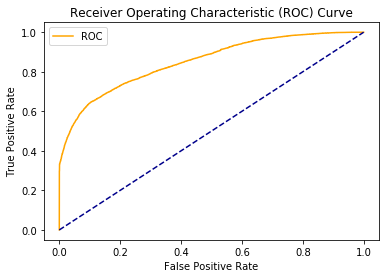

Mean False Positive Rate for Test set: 0.30576361562589105
Mean True Positive Rate for Test set: 0.7175502653061224


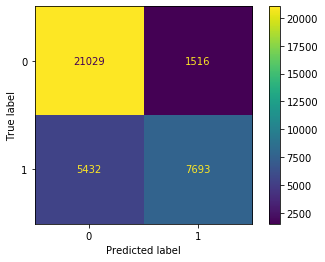

In [48]:
evaluate1(mod_logreg, X_train, X_test, y_train, y_test, use_decision_function='yes')

## 2. Decision Tree

In [49]:
mod_dt = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', DecisionTreeClassifier())])

mod_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['lead_time',
                                                   'arrival_date_year',
                                                   'arrival_date_day_of_month',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'is_repeated_guest',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
          

<class 'numpy.ndarray'>
Train Scores
------------
Accuracy: 0.9920699764502331
F1 Score: 0.9893186599773427
ROC-AUC: 0.9998251674917773
--------------------
Test Scores
-----------
Accuracy: 0.8239136529296327
F1 Score: 0.7639520463001241
ROC-AUC: 0.8160884360379769


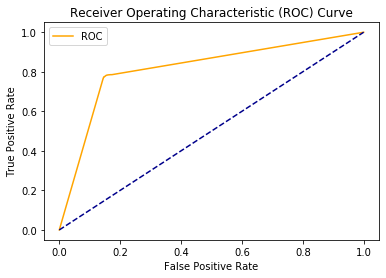

Mean False Positive Rate for Test set: 0.16342071412730097
Mean True Positive Rate for Test set: 0.7692515555555556


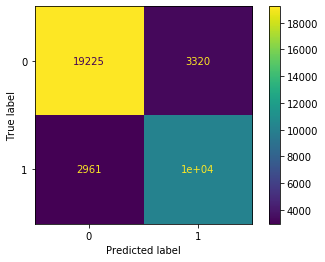

In [50]:
evaluate1(mod_dt, X_train, X_test, y_train, y_test, use_decision_function='no')

Decision Tree Model Results Analysis: As expected with a DT, the train set results in near perfect results on accuracy and F1 score, however not so much on the testing data. This is most likely due to the overfitting to the train set. We will see if we can overcome thing using Ensemble models such as Random Forest and XgBoost. 

The Confusion Matrix results for Decision Tree are better than the Logistic Regression model. Since the focus for this target feature is when the actual value is "canceled" but the model fails to predict that, the recall value is important. The Recall for Decision Tree is much higher than Logistic Regression. 

## 3. K-Nearest Neighbors

In [51]:
mod_Kn = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', KNeighborsClassifier(n_neighbors=5))])

mod_Kn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['lead_time',
                                                   'arrival_date_year',
                                                   'arrival_date_day_of_month',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'is_repeated_guest',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
          

<class 'numpy.ndarray'>
Train Scores
------------
Accuracy: 0.8699355985966262
F1 Score: 0.8179172764125078
ROC-AUC: 0.9458249565835234
--------------------
Test Scores
-----------
Accuracy: 0.8168769273899635
F1 Score: 0.742083234620548
ROC-AUC: 0.8739348105904593


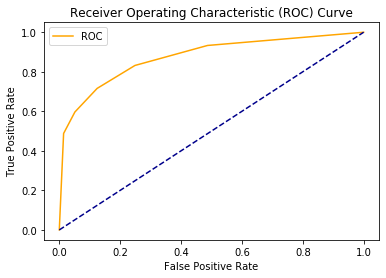

Mean False Positive Rate for Test set: 0.2750625732661661
Mean True Positive Rate for Test set: 0.6522340136054422


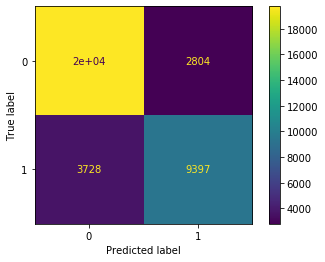

In [52]:
evaluate1(mod_Kn, X_train, X_test, y_train, y_test, use_decision_function='no')

## 4. Random Forest

In [53]:
mod_Rf = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', RandomForestClassifier())])

mod_Rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['lead_time',
                                                   'arrival_date_year',
                                                   'arrival_date_day_of_month',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'is_repeated_guest',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
          

<class 'numpy.ndarray'>
Train Scores
------------
Accuracy: 0.9920699764502331
F1 Score: 0.9893448710083627
ROC-AUC: 0.9989770285965908
--------------------
Test Scores
-----------
Accuracy: 0.8692458648724418
F1 Score: 0.8119051459912889
ROC-AUC: 0.9336818257664565


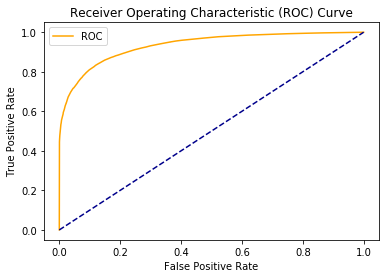

Mean False Positive Rate for Test set: 0.27423112776230074
Mean True Positive Rate for Test set: 0.8414155334861219


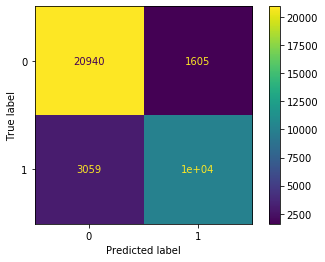

In [54]:
evaluate1(mod_Rf, X_train, X_test, y_train, y_test, use_decision_function='no')

## 5. Xg Boost

In [55]:
mod_Xg = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', GradientBoostingClassifier())])

mod_Xg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['lead_time',
                                                   'arrival_date_year',
                                                   'arrival_date_day_of_month',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'is_repeated_guest',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
          

<class 'numpy.ndarray'>
Train Scores
------------
Accuracy: 0.8187869467006296
F1 Score: 0.7178825289936401
ROC-AUC: 0.8876007333877645
--------------------
Test Scores
-----------
Accuracy: 0.8216708718811326
F1 Score: 0.7202357391036637
ROC-AUC: 0.8885884966574786


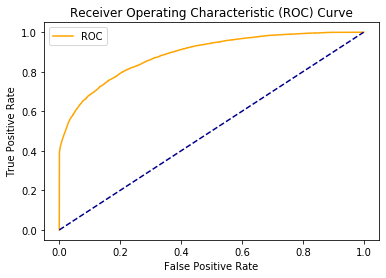

Mean False Positive Rate for Test set: 0.3712859700523078
Mean True Positive Rate for Test set: 0.8077745952095248


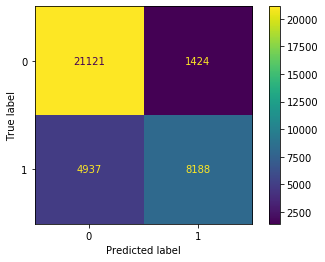

In [56]:
evaluate1(mod_Xg, X_train, X_test, y_train, y_test, use_decision_function='no')

## Grid Search for Parameter Tuning

In [57]:
#clf = GridSearchCV(RandomForestClassifier(gamma = 'auto', 
                                       #  { 'C': [1,10,20],
                                           # Kernel: ['rbf', 'linear']
                                          #  }, cv=5))
#clf.fit(X_train, y_train)


In [79]:
#leaf= np.arange
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10],
            'criterion': ['gini', 'entropy'], 
            'min_samples_leaf': np.arange(1,10)
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'XG_Boost' : {
        'model' : GradientBoostingClassifier(), 
        'params' : {
            'learning_rate': [0.1, 0.05]
    
        }
        
    },
    'Decision Tree': {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion': ['gini', 'entropy'], 
            'min_samples_leaf': [1,0.5,2]
        }
            
    }
}

In [80]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train_processed, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })


In [84]:
clf =  GridSearchCV(mp['RandonForestClassifier()'], mp['params'], cv=5, return_train_score=False)
clf.fit(X_train_processed, y_train)
clf.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 2}

In [81]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.851637,"{'criterion': 'entropy', 'min_samples_leaf': 1..."
1,logistic_regression,0.810725,{'C': 1}
2,XG_Boost,0.817513,{'learning_rate': 0.1}
3,Decision Tree,0.817790,"{'criterion': 'entropy', 'min_samples_leaf': 2}"


### Using optimized parameters for Random Forest Classifier:

In [86]:
mod_Rf2 = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', RandomForestClassifier(criterion='entropy', min_samples_leaf=1))])

mod_Rf2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['lead_time',
                                                   'arrival_date_year',
                                                   'arrival_date_day_of_month',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'is_repeated_guest',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
          

Lets Evaluate Random Forest once again with the Optimized parameters. 

<class 'numpy.ndarray'>
Train Scores
------------
Accuracy: 0.9920699764502331
F1 Score: 0.9893366077487317
ROC-AUC: 0.9989923719250985
--------------------
Test Scores
-----------
Accuracy: 0.8681805438744042
F1 Score: 0.8104185146359164
ROC-AUC: 0.9344462178288926


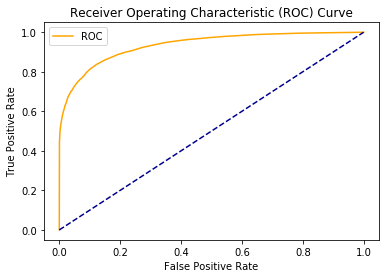

Mean False Positive Rate for Test set: 0.2723297200939854
Mean True Positive Rate for Test set: 0.8386547537227949


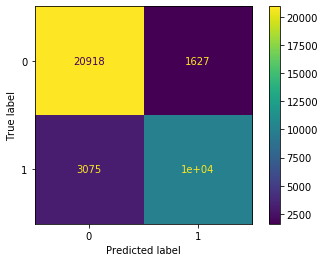

In [87]:
evaluate1(mod_Rf2, X_train, X_test, y_train, y_test, use_decision_function='no')